In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_validate, cross_val_predict, StratifiedKFold
from sklearn.metrics import roc_auc_score, f1_score
from imblearn.combine import SMOTEENN

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive/')
%cd 'drive/Shareddrives/CSCI 461/processed'
#%ls processed/*


Mounted at /content/drive/
/content/drive/Shareddrives/CSCI 461/processed


# DATA MANIPULATION

In [ ]:
# Importing the data

data = pd.read_csv("combined_ohe_17.csv")
#data.drop(columns=["Unnamed: 0"], axis=1, inplace=True)
#print(data.head())

In [ ]:
edu_matrix = data[["highedcert_associate degree","highedcert_bachelor degree","highedcert_high school or ged",
                  "highedcert_higher degree","highedcert_none of the above","highedcert_vocational certificate",
                  "highedcert_vocational license"]]
data["edu_categorical"] = edu_matrix.idxmax(axis=1)

In [ ]:
# making education binary

educationBinary = \
{   
    "highedcert_associate degree": 1,
    "highedcert_bachelor degree": 1,
    "highedcert_high school or ged": 1,
    "highedcert_higher degree": 1,
    "highedcert_none of the above":0,
    "highedcert_vocational certificate": 1,
    "highedcert_vocational license": 1
}
data['edu_binary'] = data["edu_categorical"].map(educationBinary) 

In [ ]:
# dropping overlap variables (and other outcome features, recnumbr)
# data.drop(columns=["recnumbr", "highedcert_associate degree","highedcert_bachelor degree","highedcert_high school or ged",
#                   "highedcert_higher degree","highedcert_none of the above","highedcert_vocational certificate",
#                   "highedcert_vocational license","edu_categorical", 'homeless_no','homeless_yes','subabuse_no',
#                    'subabuse_yes', 'incarc_no', 'incarc_yes', 'edu_categorical'], axis=1, inplace=True)
#subabuse
data.drop(columns=["recnumbr", "highedcert_associate degree","highedcert_bachelor degree","highedcert_high school or ged",
                  "highedcert_higher degree","highedcert_none of the above","highedcert_vocational certificate",
                  "highedcert_vocational license","edu_categorical", 'currpte_yes', 'currpte_no','currfte_yes', 
                   'currfte_no', 'edu_binary','homeless_no','homeless_yes', 'subabuse_no', 'incarc_no', 'incarc_yes', 'edu_categorical'], axis=1, inplace=True)
#data.nunique()

In [ ]:
# drop services (OPTIONAL)
data.drop(columns=['specedsv_No',
 'specedsv_Yes',
 'ilnasv_No',
 'ilnasv_Yes',
 'acsuppsv_No',
 'acsuppsv_Yes',
 'psedsuppsv_No',
 'psedsuppsv_Yes',
 'careersv_No',
 'careersv_Yes',
 'emplytrsv_No',
 'emplytrsv_Yes',
 'budgetsv_No',
 'budgetsv_Yes',
 'housedsv_No',
 'housedsv_Yes',
 'hlthedsv_No',
 'hlthedsv_Yes',
 'famsuppsv_No',
 'famsuppsv_Yes',
 'mentorsv_No',
 'mentorsv_Yes',
 'silsv_No',
 'silsv_Yes',
 'rmbrdfasv_No',
 'rmbrdfasv_Yes',
 'educfinasv_No',
 'educfinasv_Yes',
 'othrfinasv_No',
 'othrfinasv_Yes'], axis=1, inplace=True)

In [ ]:
for i in data.columns:
  if 'st' in i:
    data.drop(columns=[i], inplace=True)

In [ ]:
# filtering for age 19+ and balancing the class
#data = data[data['age']>18].sort_values('age', ascending = False).sort_values('edu_binary').iloc[:1084*2,:]

target='subabuse_yes'

#subabuse
#data = data[data['age']>18].sort_values('age', ascending = False).sort_values(target)

#filter 17

# data = data[data['age']==17]
data.drop(columns=["age"], inplace=True)

KeyError: ignored

## SETTING UP MODELS

In [ ]:
k=5
y = data.loc[:,target]
X = data.loc[:,data.columns != target]
X=X.reset_index(drop=True)
smote_enn = SMOTEENN(random_state=0)
X, y = smote_enn.fit_resample(X, y)

In [ ]:
data.subabuse_yes.value_counts() / len(data)

0    0.762521
1    0.237479
Name: subabuse_yes, dtype: float64

In [ ]:
y.value_counts() / len(y)

1    0.557137
0    0.442863
Name: subabuse_yes, dtype: float64

In [ ]:
y.value_counts()[1] / y.value_counts()[0]

1.2580340264650283

In [ ]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
#data['target'] IS THE VARIABLE USED FOR STRATIFIED SAMPLING.
splits = kfold.split(X,y)
print(f'PROPORTION OF TARGET IN THE ORIGINAL DATA\n{y.value_counts() / len(y)}\n\n')
for n,(train_index,test_index) in enumerate(splits):
    print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
          f'{y[test_index].value_counts() / len(y[test_index])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
          f'{y[train_index].value_counts() / len(y[train_index])}\n\n')


PROPORTION OF TARGET IN THE ORIGINAL DATA
1    0.557137
0    0.442863
Name: subabuse_yes, dtype: float64


SPLIT NO 1
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.557154
0    0.442846
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.557133
0    0.442867
Name: subabuse_yes, dtype: float64


SPLIT NO 2
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.557154
0    0.442846
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.557133
0    0.442867
Name: subabuse_yes, dtype: float64


SPLIT NO 3
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.557038
0    0.442962
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.557162
0    0.442838
Name: subabuse_yes, dtype: float64


SPLIT NO 4
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.557038
0    0.4

In [ ]:
# Functions to print CM heat map and performnce results

from sklearn.metrics import confusion_matrix
#from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
#import sklearn
import seaborn as sns

def my_cm(y,y_pred):
  # done backwards for labeling
  cm = confusion_matrix(y,y_pred)
  # print(cm)
  print(cm.ravel())
  print('(tn, fp, fn, tp)')
  cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
  cm_matrix = cm_matrix.loc[ ['Actual Positive:1','Actual Negative:0'], [ 'Predict Positive:1', 'Predict Negative:0']]
  #cm_matrix = cm_matrix.transpose()
  return sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')
def my_cm_dec(y,y_pred):
  cm = confusion_matrix(y,y_pred)
  # print(cm.ravel())
  # print('(tn, fp, fn, tp)')
  n=sum(cm.ravel()[:2])
  p=sum(cm.ravel()[2:])
  cm_matrix = pd.DataFrame(data=cm, columns=['Predict Negative:0','Predict Positive:1'], 
                                 index=[ 'Actual Negative:0','Actual Positive:1'])
  cm_matrix = cm_matrix.loc[ ['Actual Positive:1','Actual Negative:0'], [ 'Predict Positive:1', 'Predict Negative:0']]
  cm_matrix.loc['Actual Positive:1', :] = cm_matrix.loc['Actual Positive:1', :] /p
  cm_matrix.loc['Actual Negative:0', :]  = cm_matrix.loc['Actual Negative:0', :] /n
  sns.heatmap(cm_matrix, annot=True, cmap='YlGnBu')
  plt.show()
  return cm.ravel()
  

def my_scores(mod, X, y,k=5):
  scoring = ['accuracy', 'precision', 'f1', 'recall', 'roc_auc']
  scores = cross_validate(mod, X, y, cv=k,scoring=scoring)
  print("accuracy:",sum(scores["test_accuracy"])/k)
  print("precision:",sum(scores["test_precision"])/k)
  print("auc:",sum(scores["test_roc_auc"])/k)
  print("recall:",sum(scores["test_recall"])/k)
  print("f1:",sum(scores["test_f1"])/k)
  return 
def stdev(test_list):
  mean = sum(test_list) / len(test_list)
  return (sum([((x - mean) ** 2) for x in test_list]) / len(test_list)) ** 0.5

No Stratified Sampling, No Over-Sampling

## SVM

TIME: 0.20066222263333297 min


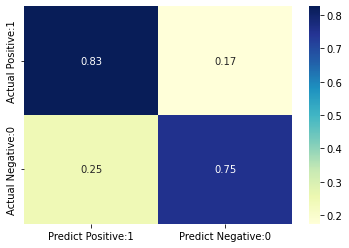

In [ ]:
# import SVC classifier
from sklearn.svm import LinearSVC

# instantiate classifier with default hyperparameters
svc=LinearSVC(class_weight="balanced", max_iter=1800) 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(svc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
my_cm_dec(y, y_pred)
plt.show()


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(svc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.7940611734341416
precision: 0.809253744631721
auc: 0.8619317326886232
recall: 0.8257007962917633
f1: 0.8171071626229416
TIME: 0.13273906118333326 min


## Random Forest Classifier

TIME: 0.10640313565000005 min


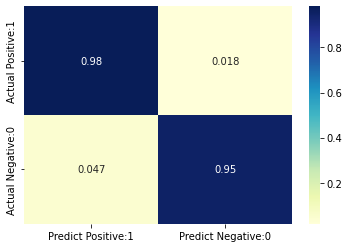

array([ 8065,   399,   195, 10453])

In [ ]:
# import RF classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier with default hyperparameters
rfc=RandomForestClassifier() 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(rfc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
# my_cm(y, y_pred)
# plt.show()
my_cm_dec(y, y_pred)


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(rfc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.9696019014056457
precision: 0.963406116493452
auc: 0.9961681925454879
recall: 0.9829089898715923
f1: 0.9730437333218823
TIME: 0.1144672631499996 min


## XGBoost Classifier

TIME: 0.17200901316666659 min


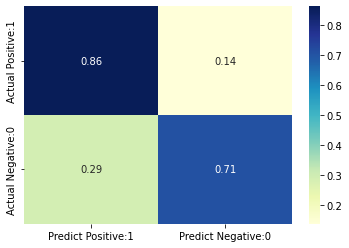

array([5999, 2465, 1476, 9172])

In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier

# instantiate classifier with default hyperparameters
model=XGBClassifier()

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(model, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
my_cm_dec(y, y_pred)


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(model,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.7937980520283126
precision: 0.7901014324310569
auc: 0.8785410104150666
recall: 0.8613831793012656
f1: 0.8237470207937839
TIME: 0.17285468286666608 min


## Logistic Regression

TIME: 0.023513813166666373 min
[2938 5526  743 9905]
(tn, fp, fn, tp)


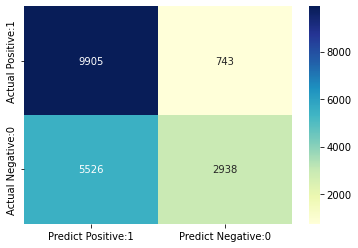

In [ ]:
# import log classifier
from sklearn.linear_model import LogisticRegressionCV

# instantiate classifier with default hyperparameters
lrc=LogisticRegressionCV(Cs=1) 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(lrc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
my_cm(y, y_pred)

In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(lrc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.6719883494555592
precision: 0.6432459569811887
auc: 0.7637289062380928
recall: 0.930219261395837
f1: 0.7601509766771375
TIME: 0.02462902316666676 min


# Stratified Sampling #

FOLD 0 
 AUC 0.8079982751401102
FOLD 1 
 AUC 0.8009933196342854
FOLD 2 
 AUC 0.7764971505636034
FOLD 3 
 AUC 0.797665323769829
FOLD 4 
 AUC 0.8110561715446344
0.7988420481304924
0.012151776828154158
0.8323723455704226
0.01106132466970913


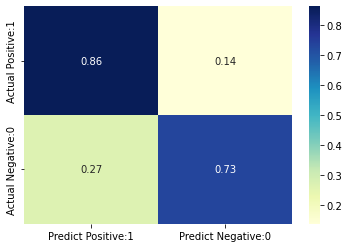

[6213 2251 1452 9196]
Female by Percenct


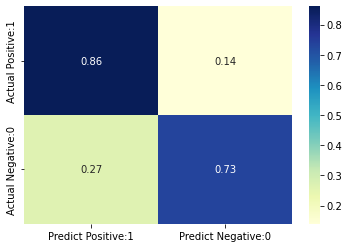

[3101 1121  721 4440]
Male by Percenct


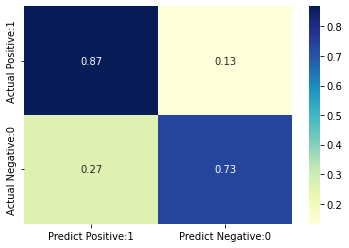

[3060 1113  714 4677]
Breakdown by amiakn
YES - By percent


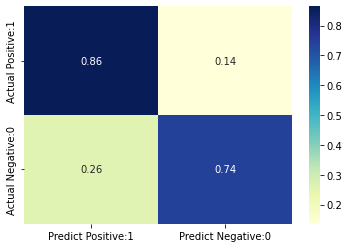

[304 105  69 440]
NO - by percent


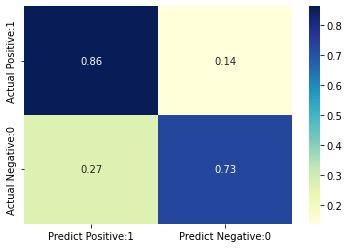

[5838 2136 1368 8669]
Breakdown by asian
YES - By percent


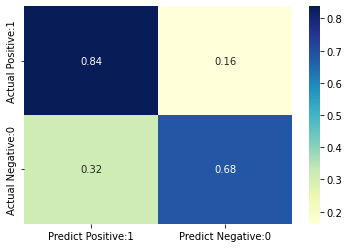

[110  51  25 129]
NO - by percent


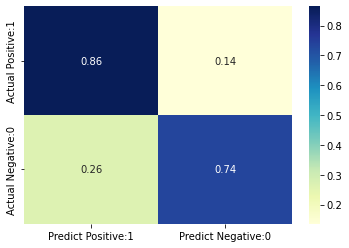

[6082 2190 1419 9033]
Breakdown by blkafram
YES - By percent


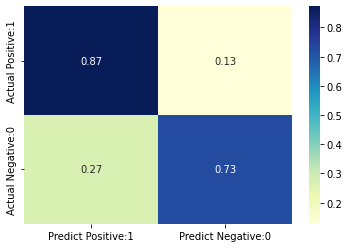

[2192  812  470 3209]
NO - by percent


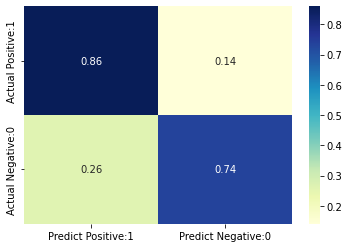

[3966 1422  970 5915]
Breakdown by hawaiipi
YES - By percent


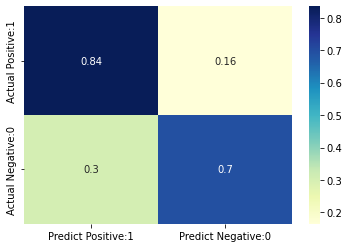

[48 21 15 76]
NO - by percent


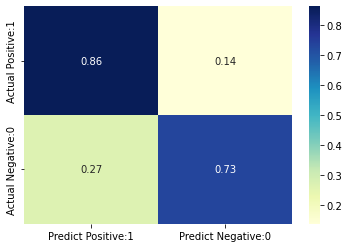

[6147 2218 1430 9090]
Breakdown by white
YES - By percent


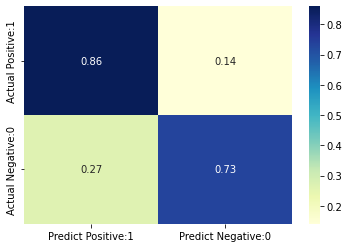

[3696 1343  926 5659]
NO - by percent


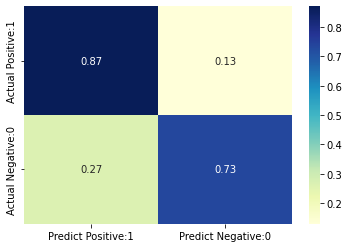

[2472  892  518 3464]
Breakdown by raceunkn
YES - By percent


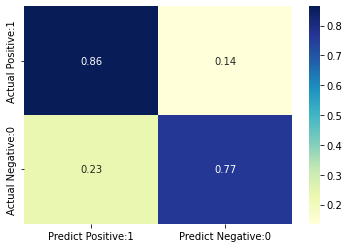

[245  75  57 363]
NO - by percent


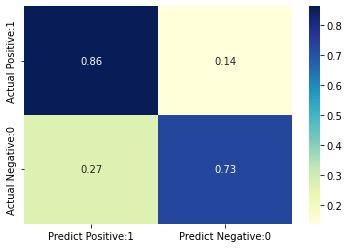

[5945 2171 1387 8791]
Breakdown by hisorgin
YES - By percent


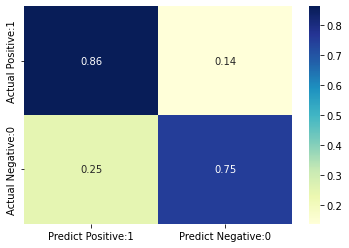

[1204  402  267 1650]
NO - by percent


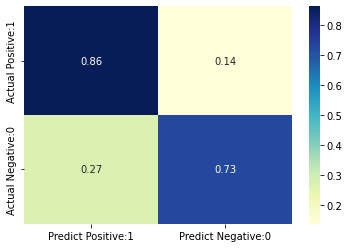

[4641 1718 1113 7057]


In [ ]:
from xgboost import XGBClassifier

# instantiate classifier with default hyperparameters
model=XGBClassifier(class_weight="balanced")
#cm=[0,0,0,0]
auc=[]
f1=[]
y_truth=[]
y_pred=[]
splits = kfold.split(X, y)
for n,(train_index, test_index) in enumerate(splits):
  model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  pred = model.predict(X.iloc[test_index, :-1])
  f=f1_score(y.iloc[test_index], pred)
  f1.append(f)
  a=roc_auc_score(y.iloc[test_index], pred)
  auc.append(a)
  print("FOLD {} \n AUC {}".format(n,a))
  # yi = my_cm_dec(y.iloc[test_index,], pred)
  # print(yi)
  # cm= [cm[i]+ yi[i] for i in range(len(cm))]
  for i in y[test_index]: y_truth.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(my_cm_dec(y_truth,y_pred))

print("Female by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_female'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_female'] == True].values]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_male'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_male'] == True].values]))
plt.show()

# for i in ['South', 'Midwest', "Northeast", 'West']:
#   print("Breakdown by {}".format(i))
#   print(my_cm_dec(pd.Series(y_truth)[region.index[region == i]], pd.Series(y_pred)[region.index[region == i]]))
#   plt.show()


for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_yes'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_yes'] == True].values]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_no'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_no'] == True].values]))
  plt.show()

FOLD 0 
 AUC 0.7979806383090827
FOLD 1 
 AUC 0.8037279990238735
FOLD 2 
 AUC 0.7810262021636352
FOLD 3 
 AUC 0.8019524486342654
FOLD 4 
 AUC 0.8083449871807679
0.7986064550623249
0.009399168388171526
0.8220706868656826
0.008330361946165727


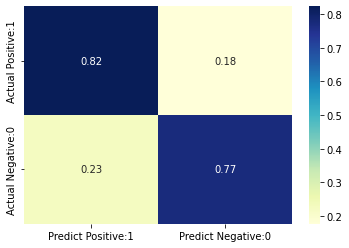

[6550 1914 1881 8767]
Female by Percenct


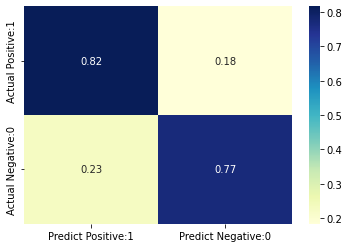

[3256  966  947 4214]
Male by Percenct


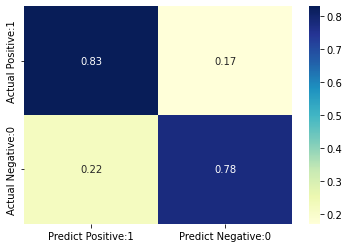

[3239  934  918 4473]
Breakdown by amiakn
YES - By percent


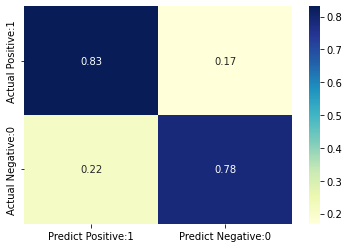

[321  88  86 423]
NO - by percent


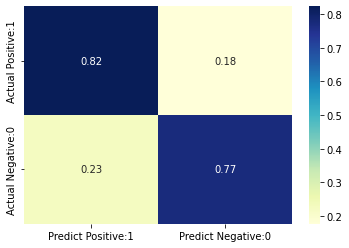

[6159 1815 1781 8256]
Breakdown by asian
YES - By percent


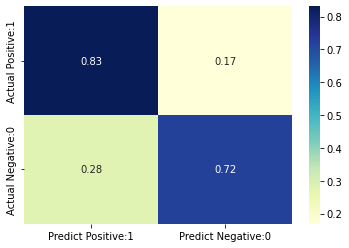

[116  45  26 128]
NO - by percent


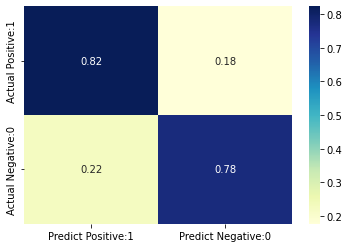

[6411 1861 1845 8607]
Breakdown by blkafram
YES - By percent


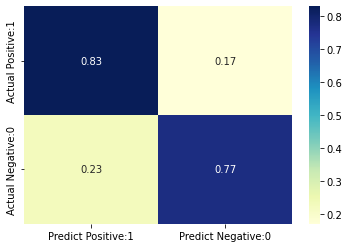

[2313  691  629 3050]
NO - by percent


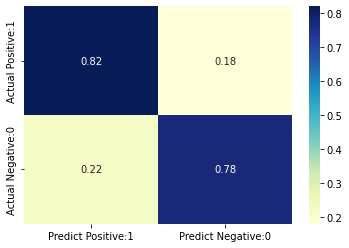

[4180 1208 1234 5651]
Breakdown by hawaiipi
YES - By percent


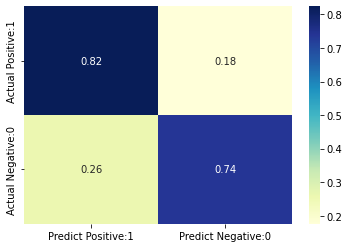

[51 18 16 75]
NO - by percent


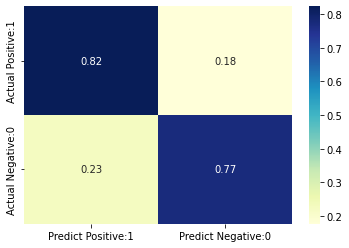

[6479 1886 1858 8662]
Breakdown by white
YES - By percent


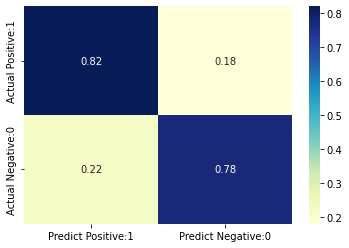

[3911 1128 1190 5395]
NO - by percent


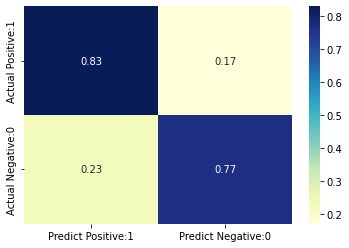

[2590  774  678 3304]
Breakdown by raceunkn
YES - By percent


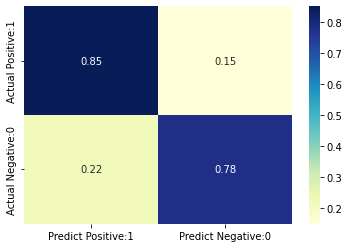

[250  70  63 357]
NO - by percent


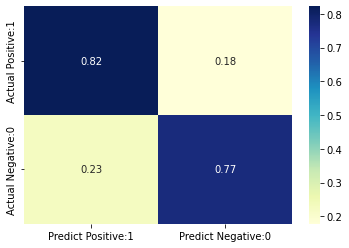

[6276 1840 1808 8370]
Breakdown by hisorgin
YES - By percent


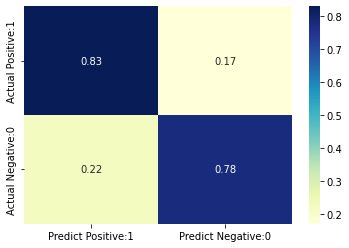

[1249  357  329 1588]
NO - by percent


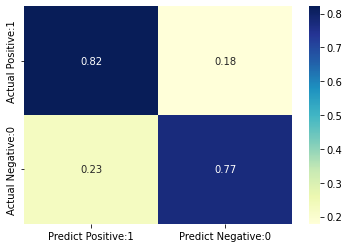

[4915 1444 1458 6712]


In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC

model=LinearSVC(class_weight="balanced", max_iter=1800) 
auc=[]
f1=[]
y_truth=[]
y_pred=[]
splits = kfold.split(X, y)
for n,(train_index, test_index) in enumerate(splits):
  model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  pred = model.predict(X.iloc[test_index, :-1])
  f=f1_score(y.iloc[test_index], pred)
  f1.append(f)
  a=roc_auc_score(y.iloc[test_index], pred)
  auc.append(a)
  print("FOLD {} \n AUC {}".format(n,a))
  # yi = my_cm_dec(y.iloc[test_index,], pred)
  # print(yi)
  # cm= [cm[i]+ yi[i] for i in range(len(cm))]
  for i in y[test_index]: y_truth.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(my_cm_dec(y_truth,y_pred))

print("Female by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_female'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_female'] == True].values]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_male'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_male'] == True].values]))
plt.show()

# for i in ['South', 'Midwest', "Northeast", 'West']:
#   print("Breakdown by {}".format(i))
#   print(my_cm_dec(pd.Series(y_truth)[region.index[region == i]], pd.Series(y_pred)[region.index[region == i]]))
#   plt.show()


for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_yes'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_yes'] == True].values]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_no'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_no'] == True].values]))
  plt.show()

FOLD 0 
 AUC 0.6914956365481727
FOLD 1 
 AUC 0.6960464103779994
FOLD 2 
 AUC 0.685550315350945
FOLD 3 
 AUC 0.6949907293785895
FOLD 4 
 AUC 0.6896488862251522
0.6915463955761718
0.003786018088774297
0.734125077897413
0.005794128573818572


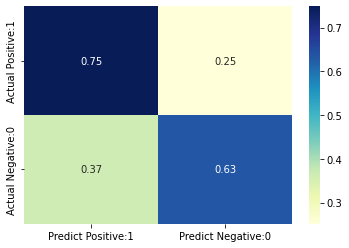

[5372 3092 2679 7969]
Female by Percenct


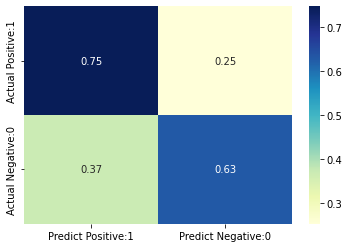

[2665 1557 1302 3859]
Male by Percenct


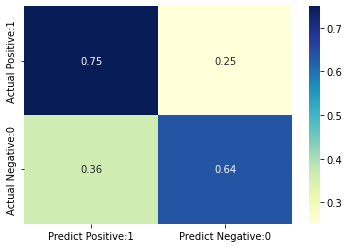

[2663 1510 1351 4040]
Breakdown by amiakn
YES - By percent


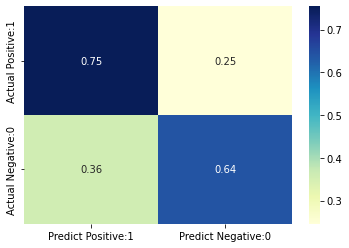

[263 146 125 384]
NO - by percent


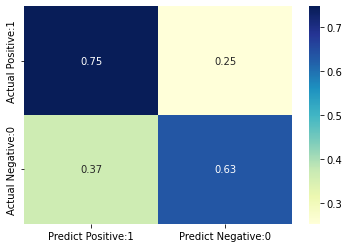

[5059 2915 2528 7509]
Breakdown by asian
YES - By percent


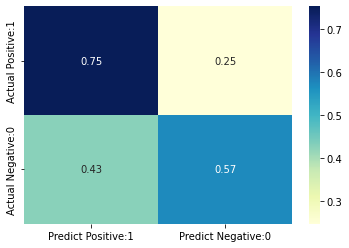

[ 92  69  38 116]
NO - by percent


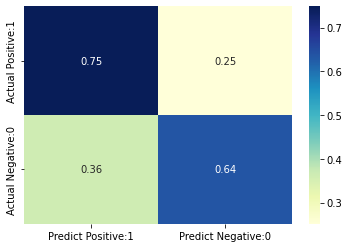

[5264 3008 2629 7823]
Breakdown by blkafram
YES - By percent


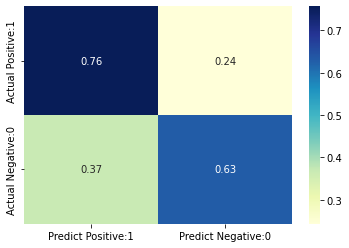

[1897 1107  896 2783]
NO - by percent


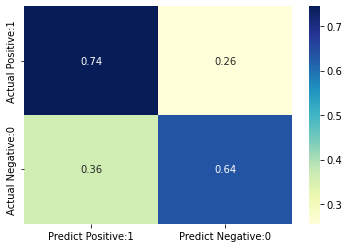

[3427 1961 1760 5125]
Breakdown by hawaiipi
YES - By percent


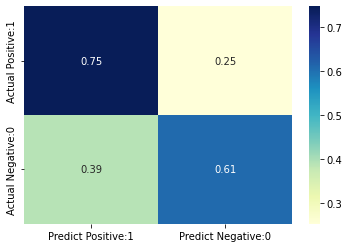

[42 27 23 68]
NO - by percent


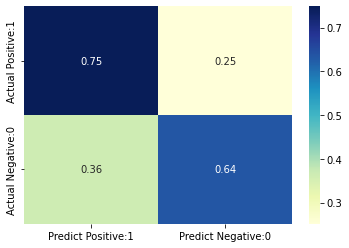

[5316 3049 2648 7872]
Breakdown by white
YES - By percent


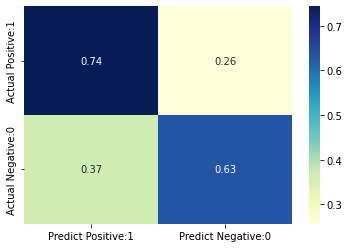

[3195 1844 1688 4897]
NO - by percent


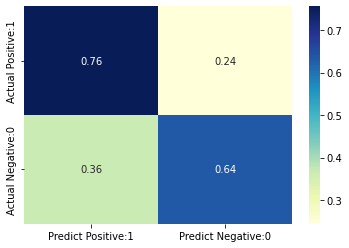

[2138 1226  971 3011]
Breakdown by raceunkn
YES - By percent


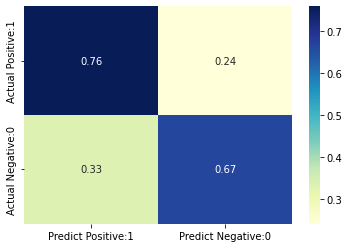

[213 107 101 319]
NO - by percent


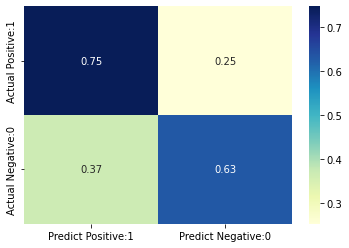

[5139 2977 2567 7611]
Breakdown by hisorgin
YES - By percent


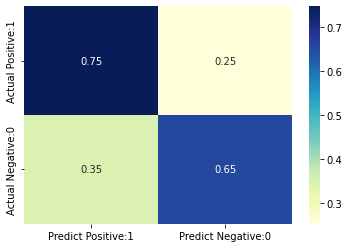

[1051  555  486 1431]
NO - by percent


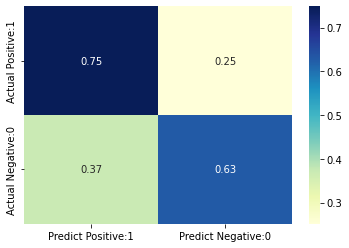

[4007 2352 2053 6117]


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

model=LogisticRegressionCV(Cs=1, class_weight="balanced") 
auc=[]
f1=[]
y_truth=[]
y_pred=[]
splits = kfold.split(X, y)
for n,(train_index, test_index) in enumerate(splits):
  model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  pred = model.predict(X.iloc[test_index, :-1])
  f=f1_score(y.iloc[test_index], pred)
  f1.append(f)
  a=roc_auc_score(y.iloc[test_index], pred)
  auc.append(a)
  print("FOLD {} \n AUC {}".format(n,a))
  # yi = my_cm_dec(y.iloc[test_index,], pred)
  # print(yi)
  # cm= [cm[i]+ yi[i] for i in range(len(cm))]
  for i in y[test_index]: y_truth.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(my_cm_dec(y_truth,y_pred))

print("Female by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_female'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_female'] == True].values]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_male'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_male'] == True].values]))
plt.show()

# for i in ['South', 'Midwest', "Northeast", 'West']:
#   print("Breakdown by {}".format(i))
#   print(my_cm_dec(pd.Series(y_truth)[region.index[region == i]], pd.Series(y_pred)[region.index[region == i]]))
#   plt.show()


for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_yes'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_yes'] == True].values]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_no'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_no'] == True].values]))
  plt.show()

FOLD 0 
 AUC 0.9773203109184739
FOLD 1 
 AUC 0.9786681696796253
FOLD 2 
 AUC 0.9753624531370989
FOLD 3 
 AUC 0.9810272009437363
FOLD 4 
 AUC 0.979858821962508
0.9784473913282884
0.001974003599856746
0.981105457148091
0.001586463481866782


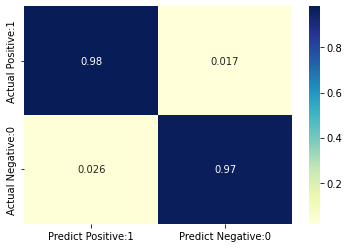

[ 8247   217   186 10462]
Female by Percenct


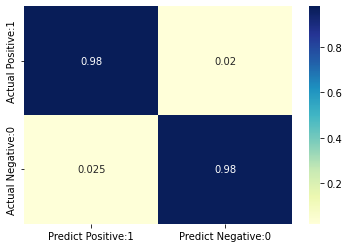

[4117  105  104 5057]
Male by Percenct


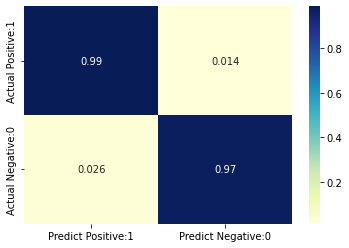

[4063  110   78 5313]
Breakdown by amiakn
YES - By percent


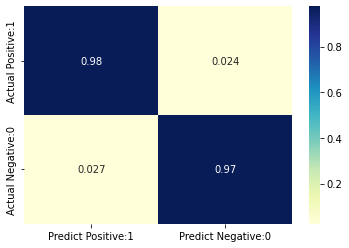

[398  11  12 497]
NO - by percent


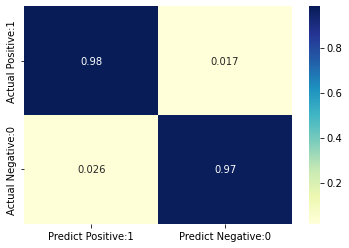

[7768  206  173 9864]
Breakdown by asian
YES - By percent


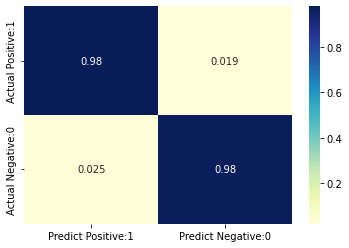

[157   4   3 151]
NO - by percent


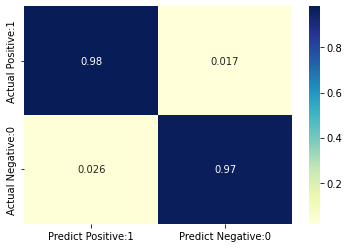

[ 8059   213   182 10270]
Breakdown by blkafram
YES - By percent


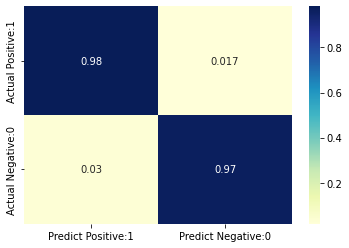

[2914   90   64 3615]
NO - by percent


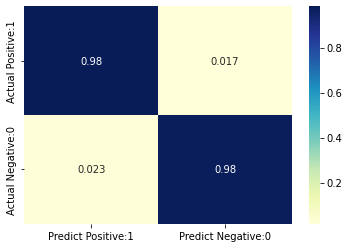

[5263  125  119 6766]
Breakdown by hawaiipi
YES - By percent


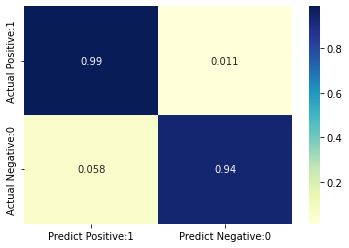

[65  4  1 90]
NO - by percent


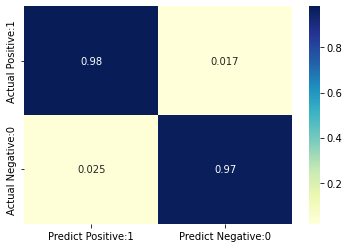

[ 8152   213   184 10336]
Breakdown by white
YES - By percent


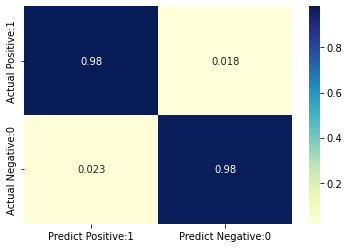

[4922  117  117 6468]
NO - by percent


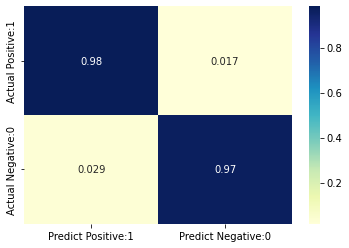

[3266   98   68 3914]
Breakdown by raceunkn
YES - By percent


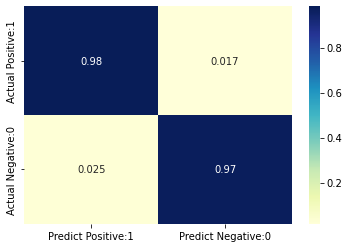

[312   8   7 413]
NO - by percent


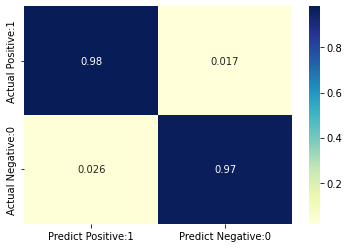

[ 7907   209   177 10001]
Breakdown by hisorgin
YES - By percent


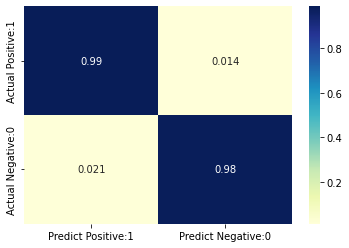

[1573   33   26 1891]
NO - by percent


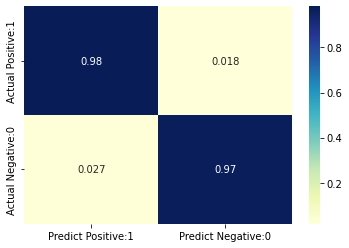

[6190  169  151 8019]


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators = 100) 
auc=[]
f1=[]
y_truth=[]
y_pred=[]
splits = kfold.split(X, y)
for n,(train_index, test_index) in enumerate(splits):
  model.fit(X.iloc[train_index, :-1], y.iloc[train_index])
  pred = model.predict(X.iloc[test_index, :-1])
  f=f1_score(y.iloc[test_index], pred)
  f1.append(f)
  a=roc_auc_score(y.iloc[test_index], pred)
  auc.append(a)
  print("FOLD {} \n AUC {}".format(n,a))
  # yi = my_cm_dec(y.iloc[test_index,], pred)
  # print(yi)
  # cm= [cm[i]+ yi[i] for i in range(len(cm))]
  for i in y[test_index]: y_truth.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(my_cm_dec(y_truth,y_pred))

print("Female by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_female'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_female'] == True].values]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X['sex_male'] == True].values], pd.Series(y_pred).iloc[X.index[X['sex_male'] == True].values]))
plt.show()

# for i in ['South', 'Midwest', "Northeast", 'West']:
#   print("Breakdown by {}".format(i))
#   print(my_cm_dec(pd.Series(y_truth)[region.index[region == i]], pd.Series(y_pred)[region.index[region == i]]))
#   plt.show()


for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_yes'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_yes'] == True].values]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y_truth).iloc[X.index[X[i+'_no'] == True].values], pd.Series(y_pred).iloc[X.index[X[i+'_no'] == True].values]))
  plt.show()

#Over Sampling - Archive

In [ ]:
# OVER SAMPLING
over = pd.DataFrame()
for i in range(2):
  over=over.append(data[data["subabuse_yes"] == 1])
over=over.append(data[data["subabuse_yes"] == 1].iloc[:int(5980 /2),:])
data=data.append(over).sample(frac=1)


In [ ]:
k=5
y = data.loc[:,target]
X = data.loc[:,data.columns != target]
X=X.reset_index(drop=True)

In [ ]:
kfold = StratifiedKFold(n_splits=5,shuffle=True,random_state=11)
#data['target'] IS THE VARIABLE USED FOR STRATIFIED SAMPLING.
splits = kfold.split(data.iloc[:,:-1],data[target])
print(f'PROPORTION OF TARGET IN THE ORIGINAL DATA\n{data[target].value_counts() / len(data)}\n\n')
for n,(train_index,test_index) in enumerate(splits):
    print(f'SPLIT NO {n+1}\nTRAINING SET SIZE: {np.round(len(train_index) / (len(train_index)+len(test_index)),2)}'+
          f'\tTEST SET SIZE: {np.round(len(test_index) / (len(train_index)+len(test_index)),2)}\nPROPORTION OF TARGET IN THE TRAINING SET\n'+
          f'{data.iloc[test_index,-1].value_counts() / len(data.iloc[test_index,-1])}\nPROPORTION OF TARGET IN THE TEST SET\n'+
          f'{data.iloc[train_index,-1].value_counts() / len(data.iloc[train_index,-1])}\n\n')

PROPORTION OF TARGET IN THE ORIGINAL DATA
1    0.505136
0    0.494864
Name: subabuse_yes, dtype: float64


SPLIT NO 1
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.50515
0    0.49485
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.505132
0    0.494868
Name: subabuse_yes, dtype: float64


SPLIT NO 2
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.50515
0    0.49485
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.505132
0    0.494868
Name: subabuse_yes, dtype: float64


SPLIT NO 3
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.50515
0    0.49485
Name: subabuse_yes, dtype: float64
PROPORTION OF TARGET IN THE TEST SET
1    0.505132
0    0.494868
Name: subabuse_yes, dtype: float64


SPLIT NO 4
TRAINING SET SIZE: 0.8	TEST SET SIZE: 0.2
PROPORTION OF TARGET IN THE TRAINING SET
1    0.50515
0    0.49485
Na

# SVC - Archive

TIME: 1.1694390911166692 min


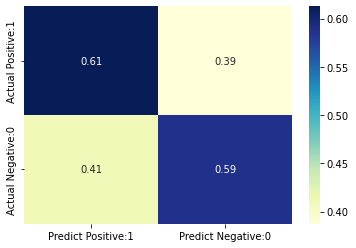

In [ ]:
# import SVC classifier
from sklearn.svm import LinearSVC

# instantiate classifier with default hyperparameters
svc=LinearSVC(class_weight="balanced", max_iter=1800) 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(svc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
print(my_cm_dec(y, y_pred))
plt.show()


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(svc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.6006580829756796
precision: 0.6030765199668959
auc: 0.6362261616752557
recall: 0.6127050710860422
f1: 0.6078484295364242
TIME: 1.5559036127500045 min


## Random Forest Classifier

TIME: 1.0458250487500058 min


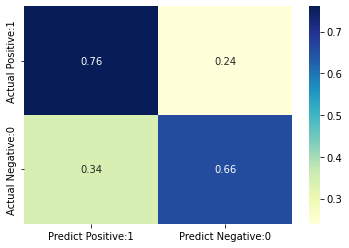

[22735 11856  8466 26843]


In [ ]:
# import RF classifier
from sklearn.ensemble import RandomForestClassifier

# instantiate classifier with default hyperparameters
rfc=RandomForestClassifier(class_weight="balanced") 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(rfc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
# my_cm(y, y_pred)
# plt.show()
print(my_cm_dec(y, y_pred))


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(rfc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.708483547925608
precision: 0.6932924713623484
auc: 0.7949221020277336
recall: 0.7584750616176363
f1: 0.7244015006611192
TIME: 1.1352756406166615 min


## XGBoost Classifier

TIME: 1.2104265494666682 min
[18672 15919 11625 23684]
(tn, fp, fn, tp)


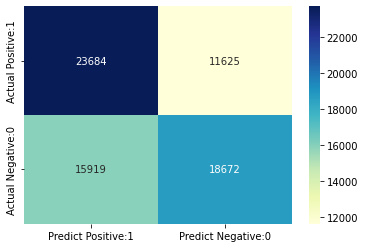

In [ ]:
#XGBoost Classifier
from xgboost import XGBClassifier

# instantiate classifier with default hyperparameters
model=XGBClassifier(class_weight="balanced")

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(model, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
print(my_cm_dec(y, y_pred))


In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(model,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.6059513590844063
precision: 0.5980313137771868
auc: 0.6438620978326094
recall: 0.6707637827435002
f1: 0.6322857279489368
TIME: 1.067358348250006 min


## Logistic Regression

TIME: 0.16846693920000083 min
[18087 16504 13789 21520]
(tn, fp, fn, tp)


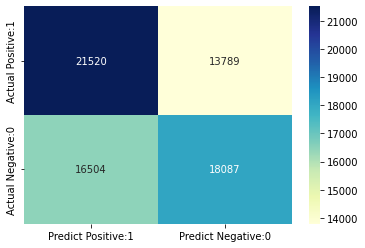

In [ ]:
# import log classifier
from sklearn.linear_model import LogisticRegressionCV

# instantiate classifier with default hyperparameters
lrc=LogisticRegressionCV(Cs=1, class_weight="balanced") 

# make predictions on test set
start = time.perf_counter()
y_pred = cross_val_predict(lrc, X, y, cv=k)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

# print confusion matrix
my_cm(y, y_pred)

In [ ]:
# print performance scores
start = time.perf_counter()
my_scores(lrc,X,y)
end = time.perf_counter()
print("TIME:",(end-start)/60,"min")

accuracy: 0.566623748211731
precision: 0.5659557198675477
auc: 0.5945406191375431
recall: 0.6094764356936324
f1: 0.5868999801986261
TIME: 0.17140455298332805 min


#With Oversampling + Stratified - Archive



0.6054089064848427
0.002765659623092007
0.6328779261351537
0.0027886177745994156
[5, 0, 5, 5]
Female by Percenct


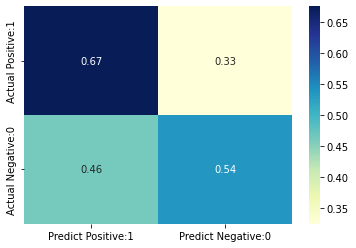

[ 9280  8014  5841 12119]
Male by Percenct


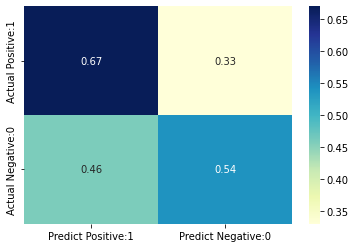

[ 9353  7944  5735 11614]
Breakdown by white
YES - By percent


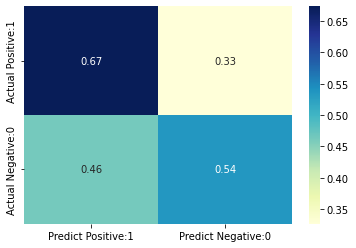

[12394 10742  7765 15991]
NO - by percent


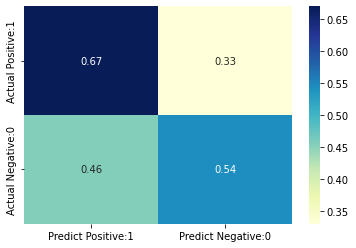

[6237 5215 3806 7740]
Breakdown by blkafram
YES - By percent


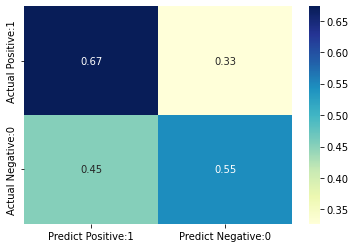

[6075 5038 3675 7558]
NO - by percent


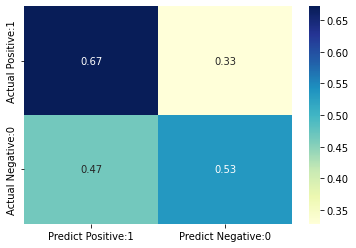

[12555 10919  7895 16173]


In [ ]:
from xgboost import XGBClassifier

# instantiate classifier with default hyperparameters
model=XGBClassifier(class_weight="balanced")
cm=[0,0,0,0]
auc=[]
f1=[]
y=[]
y_pred=[]
splits = kfold.split(data.iloc[:,:-1],data[target])
for n,(train_index, test_index) in enumerate(splits):
  model.fit(data.iloc[train_index, :-1], data.iloc[train_index, -1])
  pred = model.predict(data.iloc[test_index, :-1])
  f=f1_score(data.iloc[test_index, -1], pred)
  f1.append(f)
  a=roc_auc_score(data.iloc[test_index, -1], pred)
  auc.append(a)
  for i in data.iloc[test_index, -1]: y.append(i)
  for i in pred: y_pred.append(i)
  cm= [cm[i]+ y[i] for i in range(len(cm))]
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(cm)


print("Female by Percenct")

print(my_cm_dec(pd.Series(y)[X.index[X['sex_female'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_female'] == True].tolist()]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y)[X.index[X['sex_male'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_male'] == True].tolist()]))
plt.show()

for i in ['white', 'blkafram']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_yes']==True].tolist()],pd.Series(y_pred)[X.index[X[i+'_yes'] == True].tolist()]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_no'] == True].tolist()],pd.Series(y_pred)[X.index[X[i+'_no'] == True].tolist()]))
  plt.show()

0.6008262344545315
0.0048464284766503276
0.6078474061482901
0.00599731353731467
[5, 0, 5, 5]
Female by Percenct


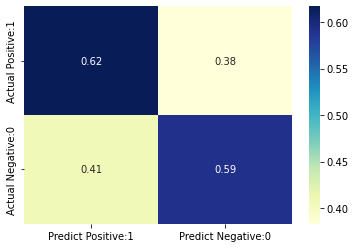

[10231  7063  6881 11079]
Male by Percenct


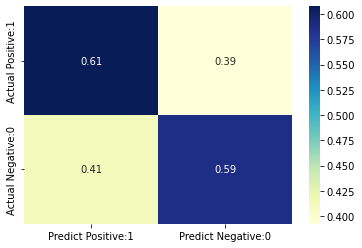

[10155  7142  6808 10541]
Breakdown by white
YES - By percent


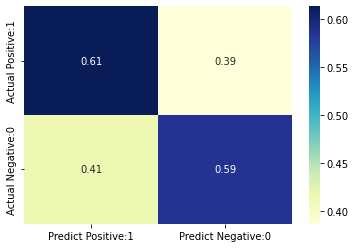

[13539  9597  9197 14559]
NO - by percent


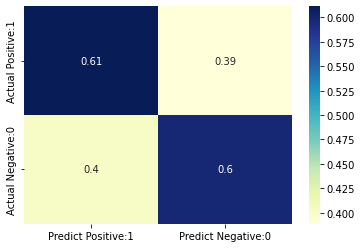

[6845 4607 4487 7059]
Breakdown by blkafram
YES - By percent


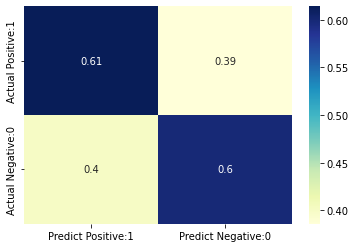

[6657 4456 4335 6898]
NO - by percent


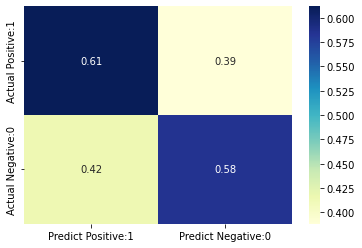

[13726  9748  9348 14720]


In [ ]:
# Linear SVC
from sklearn.svm import LinearSVC

model=LinearSVC(class_weight="balanced", max_iter=1800) 
cm=[0,0,0,0]
auc=[]
f1=[]
y=[]
y_pred=[]
splits = kfold.split(data.iloc[:,:-1],data[target])
for n,(train_index, test_index) in enumerate(splits):
  model.fit(data.iloc[train_index, :-1], data.iloc[train_index, -1])
  pred = model.predict(data.iloc[test_index, :-1])
  f=f1_score(data.iloc[test_index, -1], pred)
  f1.append(f)
  a=roc_auc_score(data.iloc[test_index, -1], pred)
  auc.append(a)
  for i in data.iloc[test_index, -1]: y.append(i)
  for i in pred: y_pred.append(i)
  cm= [cm[i]+ y[i] for i in range(len(cm))]
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(cm)


print("Female by Percenct")

print(my_cm_dec(pd.Series(y)[X.index[X['sex_female'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_female'] == True].tolist()]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y)[X.index[X['sex_male'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_male'] == True].tolist()]))
plt.show()

for i in ['white', 'blkafram']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_yes']==True].tolist()],pd.Series(y_pred)[X.index[X[i+'_yes'] == True].tolist()]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_no'] == True].tolist()],pd.Series(y_pred)[X.index[X[i+'_no'] == True].tolist()]))
  plt.show()

0.5665444447328422
0.005060647450284838
0.587521427889529
0.003987866391309286
[5, 0, 5, 5]
Female by Percenct


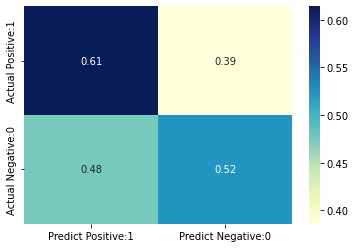

[ 9072  8222  6931 11029]
Male by Percenct


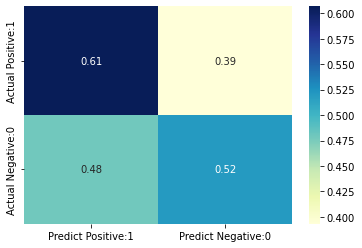

[ 9005  8292  6822 10527]
Breakdown by white
YES - By percent


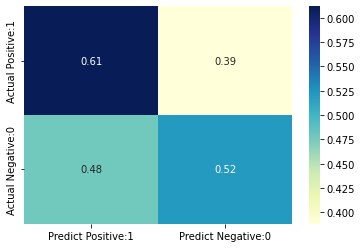

[12055 11081  9224 14532]
NO - by percent


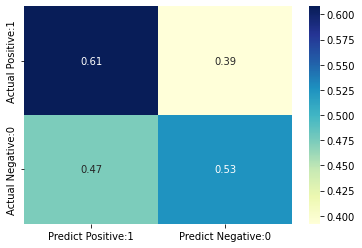

[6020 5432 4526 7020]
Breakdown by blkafram
YES - By percent


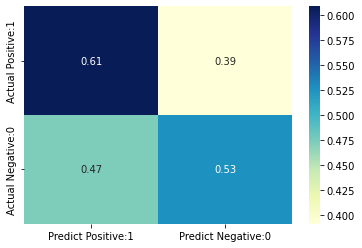

[5858 5255 4391 6842]
NO - by percent


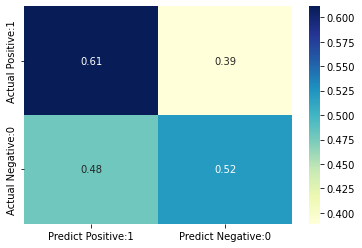

[12217 11257  9359 14709]


In [ ]:
# Logistic Regression
from sklearn.linear_model import LogisticRegressionCV

model=LogisticRegressionCV(Cs=1, class_weight="balanced") 
cm=[0,0,0,0]
auc=[]
f1=[]
y=[]
y_pred=[]
splits = kfold.split(data.iloc[:,:-1],data[target])
for n,(train_index, test_index) in enumerate(splits):
  model.fit(data.iloc[train_index, :-1], data.iloc[train_index, -1])
  pred = model.predict(data.iloc[test_index, :-1])
  f=f1_score(data.iloc[test_index, -1], pred)
  f1.append(f)
  a=roc_auc_score(data.iloc[test_index, -1], pred)
  auc.append(a)
  for i in data.iloc[test_index, -1]: y.append(i)
  for i in pred: y_pred.append(i)
  cm= [cm[i]+ y[i] for i in range(len(cm))]
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))
print(cm)


print("Female by Percenct")

print(my_cm_dec(pd.Series(y)[X.index[X['sex_female'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_female'] == True].tolist()]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y)[X.index[X['sex_male'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_male'] == True].tolist()]))
plt.show()

for i in ['white', 'blkafram']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_yes']==True].tolist()],pd.Series(y_pred)[X.index[X[i+'_yes'] == True].tolist()]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_no'] == True].tolist()],pd.Series(y_pred)[X.index[X[i+'_no'] == True].tolist()]))
  plt.show()

0.5665444447328422
0.005060647450284838
0.587521427889529
0.003987866391309286
[5, 0, 5, 5]
Female by Percenct


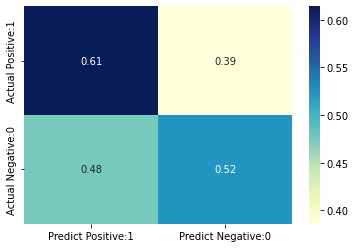

[ 9072  8222  6931 11029]
Male by Percenct


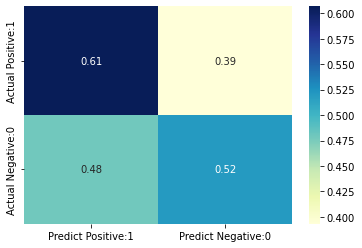

[ 9005  8292  6822 10527]
Breakdown by white
YES - By percent


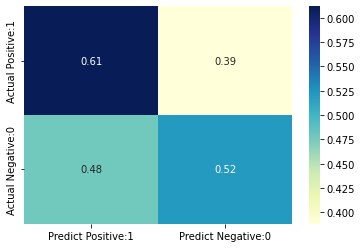

[12055 11081  9224 14532]
NO - by percent


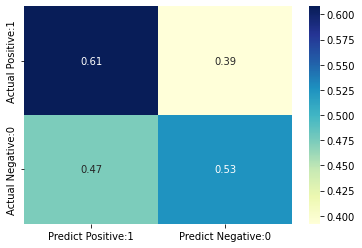

[6020 5432 4526 7020]
Breakdown by blkafram
YES - By percent


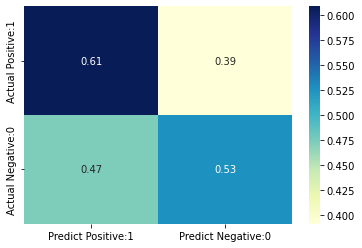

[5858 5255 4391 6842]
NO - by percent


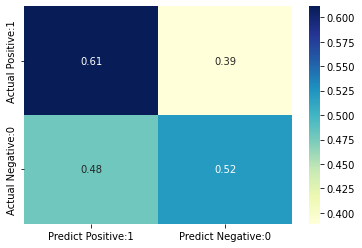

[12217 11257  9359 14709]


In [ ]:
#random forest
from sklearn.ensemble import RandomForestClassifier

rfc=RandomForestClassifier(n_estimators = 10, criterion="entropy", class_weight="balanced") 
cm=[0,0,0,0]
auc=[]
f1=[]
y=[]
y_pred=[]
splits = kfold.split(data.iloc[:,:-1],data[target])
for n,(train_index, test_index) in enumerate(splits):
  model.fit(data.iloc[train_index, :-1], data.iloc[train_index, -1])
  pred = model.predict(data.iloc[test_index, :-1])
  f=f1_score(data.iloc[test_index, -1], pred)
  f1.append(f)
  a=roc_auc_score(data.iloc[test_index, -1], pred)
  auc.append(a)
  for i in data.iloc[test_index, -1]: y.append(i)
  for i in pred: y_pred.append(i)
print(sum(auc)/5)
print(stdev(auc))
print(sum(f1)/5)
print(stdev(f1))


print("Female by Percenct")

print(my_cm_dec(pd.Series(y)[X.index[X['sex_female'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_female'] == True].tolist()]))
plt.show()
print("Male by Percenct")
print(my_cm_dec(pd.Series(y)[X.index[X['sex_male'] == True].tolist()],pd.Series(y_pred)[X.index[X['sex_male'] == True].tolist()]))
plt.show()

for i in ['white', 'blkafram']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_yes']==True].tolist()],pd.Series(y_pred)[X.index[X[i+'_yes'] == True].tolist()]))
  plt.show()

  print("NO - by percent")
  print(my_cm_dec(pd.Series(y)[X.index[X[i+'_no'] == True].tolist()],pd.Series(y_pred)[X.index[X[i+'_no'] == True].tolist()]))
  plt.show()

In [ ]:
print("Breakdown by Sex")
print("Female by Number")
my_cm(y.iloc[X.index[X['sex_female'] == True].tolist()].values,y_pred[X.index[X['sex_female'] == True].tolist()])
plt.show()
print("Male by Number")
my_cm(y.iloc[X.index[X['sex_male'] == True].tolist()].values,y_pred[X.index[X['sex_male'] == True].tolist()])
plt.show()
print("Female by Percenct")
my_cm_dec(y.iloc[X.index[X['sex_female'] == True].tolist()].values,y_pred[X.index[X['sex_female'] == True].tolist()])
plt.show()
print("Male by Percenct")
my_cm_dec(y.iloc[X.index[X['sex_male'] == True].tolist()].values,y_pred[X.index[X['sex_male'] == True].tolist()])
plt.show()

for i in ['amiakn','asian', 'blkafram', 'hawaiipi', 'white','raceunkn', 'hisorgin']:
  print("Breakdown by {}".format(i))

  print("YES - By percent")
  my_cm_dec(y.iloc[X.index[X[i+'_yes']==True].tolist()].values,y_pred[X.index[X[i+'_yes'] == True].tolist()])
  plt.show()

  print("NO - by percent")
  my_cm_dec(y.iloc[X.index[X[i+'_no'] == True].tolist()].values,y_pred[X.index[X[i+'_no'] == True].tolist()])
  plt.show()

  print("YES - By numbers")
  my_cm(y.iloc[X.index[X[i+'_yes']==True].tolist()].values,y_pred[X.index[X[i+'_yes'] == True].tolist()])
  plt.show()

  print("NO - By numbers")
  my_cm(y.iloc[X.index[X[i+'_no'] == True].tolist()].values,y_pred[X.index[X[i+'_no'] == True].tolist()])
  plt.show()